# 학습목표
---
- 파이썬에서 텍스트 데이터를 어떻게 처리하는지 알아 봅니다.     
- 파이썬에서 텍스트 파일과 디렉토리에 접근하는 방법을 알아 봅니다.     
- 텍스트 파일의 종류를 살펴보고 각각 다루는 방법을 연습해 봅니다.    

# 11-2. 텍스트 데이터를 문자열로 저장하기
---


In [2]:
my_str = 'Welcome!'
ur_str = "You're welcome."

print(my_str)
print(ur_str)

#- 아래 주석을 제거해 각 변수의 자료형을 확인해보세요 :)
type(my_str)
type(ur_str)

Welcome!
You're welcome.


str

## 인코딩과 디코딩
---
* byte - 컴퓨터의 기본 저장단위
      * 1 byte 는 8 bit
      * 1 byte에 2^8 즉 256개의 고유한 값을 저장 할 수 있다.
* 인코딩 - 문자열을 바이트로 변환하는 과정
* 디코딩 - 바이트를 문자열로 변환하는 과정

In [10]:
print(ord('a'))    # ord('a') 문자
print(ord('A'))
print(chr(97))
print(ord('가'))
print(chr(0xAC00))   
#- 0xAC00은 44032의 16진수 표현입니다.

97
65
a
44032
가


- 파이썬 2에서는 인코딩을 한 후에도 **아스키(ascii) → 유니코드(unicode) 변환** 등의 작업을 거쳐야 했던 반면에,    

- 파이썬 3부터는 **문자열이 무조건 유니코드로 인코딩**되므로 해당 텍스트가 인코딩이 되어 있는지 혹은 디코딩이 되어 있는지만 고려하면 된다는 것이 포인트입니다.

# 11-3. 텍스트 데이터를 문자열로 저장한다는 것 (2) 문자열 다루기
---
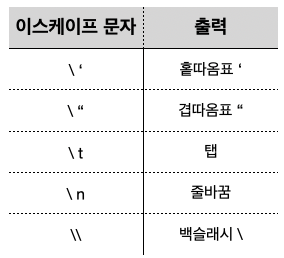

### 이스케이프 문자 연습하기

In [17]:
#- 줄 바꿈
print("사회적\n거리두기")
print('--------------------------')

#- 탭(tab)
print("사회적\t거리두기")
print('--------------------------')

#- 홑따옴표 '' 포함
print('오늘부터 \'사회적 거리두기\'')
print('--------------------------')

#- 겹따옴표 "" 포함
print('오늘부터 \"사회적 거리두기\"')
print('--------------------------')

#- 백슬래시 \
print('오늘부터 \\사회적 \\거리두기')
print('--------------------------')

#- 예제 연습
print('I don\'t like python')

사회적
거리두기
--------------------------
사회적	거리두기
--------------------------
오늘부터 '사회적 거리두기'
--------------------------
오늘부터 "사회적 거리두기"
--------------------------
오늘부터 \사회적 \거리두기
--------------------------
I don't like python


### 원시 문자열 (raw string) - 이스케이프 문자열을 무시하고 싶을 때
---
문자열을 시작하는 따옴표 앞에 <mark>r</mark>을 붙이면 이스케이프 문자가 적용되지 않은 있는 그대로의 <mark>원시 문자열</mark>을 나타낼 수 있습니다.

In [24]:
print('Hello, "Python"')
print('--------------------------')
print(r'Hello, /"Python"')

Hello, "Python"
--------------------------
Hello, /"Python"


### startswith, endswith

---

생산직은 OB로, 사무직은 OW로 시작되는 직원 ID가 저장된 데이터베이스가 있다고 해봅시다.     
생산직에 속한 직원 ID만을 추려보고 싶을 때 <mark>startswith</mark>를 사용하면 되는데요. 아래 코드로 한번 확인해 보겠습니다.

In [25]:
EmployeeID = ['OB94382', 'OW34723', 'OB32308', 'OB83461', 
                                  'OB74830', 'OW37402', 'OW11235', 'OB82345'] 
Production_Employee = [P for P in EmployeeID if P.startswith('OB')]   # 'OB'로 시작하는 직원 ID를 다 찾아봅니다
Production_Employee

['OB94382', 'OB32308', 'OB83461', 'OB74830', 'OB82345']

In [26]:
EmployeeID = ['OB94382', 'OW34723', 'OB32308', 'OB83461', 
                                  'OB74830', 'OW37402', 'OW11235', 'OB82345'] 
Production_Employee = [P for P in EmployeeID if P.startswith('OW')]
Production_Employee

['OW34723', 'OW37402', 'OW11235']

폴더안에서 .png 파일만 얻고 싶다면 어떻게 해야 할까요?     
<mark>endswith()</mark>를 통해 해당 파일(들)을 찾을 수 있습니다.

In [28]:
import os
photo = os.listdir('/Users/kyurishin/Design')
jpg = [jpg for jpg in photo if jpg.endswith('.jpg')]
print(jpg)

['Side-01.jpg', 'bird.jpg', 'Artboard 2.jpg', 'Artboard 1.jpg']


In [34]:
import os
image_dir_path = os.getenv("HOME") + "/Design"   

#- 각자의 사진이 보관된 디렉토리를 골라 주세요.
photo = os.listdir(image_dir_path )
jpg = [jpg for jpg in photo if jpg.endswith('.jpg')]
print(jpg)

['Side-01.jpg', 'bird.jpg', 'Artboard 2.jpg', 'Artboard 1.jpg']


### 공백 문자 처리 : trimming
---
- space : 한 칸 띄어쓰기
- tab \t : 네 칸 띄어쓰기. 경우에 따라 두 칸 띄어쓰기로 표기되기도 합니다.
- new line : 줄 바꿈
- line feed \n : 줄 바꿈을 엄밀히 말하면 라인 피드라고 합니다.
- carriage return \r : 커서를 맨 앞으로 이동시키는 것, 즉 커서를 원위치로 복귀(return)한다는 뜻입니다.

In [37]:
print("사회적 거리두기")
print('--------------------------')
print("사회적\t거리두기")
print('--------------------------')
print("사회적\n거리두기")
print('--------------------------')
print("사회적\r거리두기")
print('안녕하세요 제 이름은 \r신규리입니다')
print('--------------------------')

사회적 거리두기
--------------------------
사회적	거리두기
--------------------------
사회적
거리두기
--------------------------
거리두기
신규리입니다
--------------------------


### 공백 문자 제거하기 : strip( )
---

In [38]:
#txt = "      공백 문자를 제거해 보아요.      "
txt = "      Strip white spaces.      "
print('[{}]'.format(txt))
print('--------------------------')

#- 양쪽 공백 제거 : strip()
print('[{}]'.format(txt.strip()))
print('--------------------------')

#- 왼쪽 공백 제거 : lstrip()
print('[{}]'.format(txt.lstrip()))
print('--------------------------')

#- 오른쪽 공백 제거 : rstrip()
print('[{}]'.format(txt.rstrip()))

[      Strip white spaces.      ]
--------------------------
[Strip white spaces.]
--------------------------
[Strip white spaces.      ]
--------------------------
[      Strip white spaces.]


### 대소문자 관련
---
- upper( ) : 모든 문자를 대문자로 변환합니다.
- lower( ) : 모든 문자를 소문자로 변환합니다.
- capitalize( ) : 첫 글자만 대문자로 변환합니다.

In [41]:
#- 모든 문자를 대문자로 변환 : upper()
txt = "I fell into AIFFEL"
txt.upper()

'I FELL INTO AIFFEL'

In [42]:
#- 모든 문자를 소문자로 변환 : lower()
txt.lower()

'i fell into aiffel'

In [43]:
#- 첫 글자만 대문자로 변환 : capitalize()
txt.capitalize()

'I fell into aiffel'

### isX
---
다음 소개해 드릴 메소드는 isX 형태의 메소드들인데요. 문자열의 구성에 따라 불린(boolean)의 값을 반환(return)해줍니다.

- isupper( ) : 문자열이 모두 대문자로만 되어 있으면 True, 그렇지 않으면 False를 반환
- islower( ) : 문자열이 모두 소문자로만 되어 있으면 True, 그렇지 않으면 False를 반환
- istitle( ): 문자열의 첫 글자만 대문자로 되어 있으면 True, 그렇지 않으면 False를 반환
- isalpha( ): 문자열이 모두 알파벳 문자로만 되어 있으면 True, 그렇지 않으면 False를 반환
- isalnum( ): 문자열이 모두 알파벳 문자와 숫자로만 되어 있으면 True, 그렇지 않으면 False를 반환
- isdecimal( ): 문자열이 모두 숫자로만 되어 있으면 True, 그렇지 않으면 False를 반환

In [44]:
print("aiffel".isupper())
print("aiffel".islower())
print("PYTHON".istitle())
print("python101".isalpha())
print("python101".isalnum())
print("101".isdecimal())

False
True
False
False
True
True


### join( )과 split( )
---
join( )은 인자로 tuple, list, string 등 반복 가능한(iterable) 객체를 받는 메소드입니다.     
이 join( )은 각각의 원소를 모아 하나의 문자열로 합쳐 주는데요. 일단 한번 실행해 봅시다.

In [47]:
#- join()
stages = ['fundamentals', 'exploration', 'goingdeeper']
", ".join(stages)

'fundamentals, exploration, goingdeeper'

In [49]:
#- split()
'fundamentals, exploration, goingdeeper'.split(',')

['fundamentals', ' exploration', ' goingdeeper']

split( )은 리스트를 반환하고 join( )은 문자열을 반환한다는 차이가 보이네요. 기억해두면 좋겠죠?

### replace( )
---
replace( ) : replace(s1, s2) 형태로 문자열 내 문자열 s1을 s2로 바꿉니다.

In [50]:
sent = 'I can do it!'
sent.replace('I', 'You')

'You can do it!'

### 불변(immutable)의 문자열
---
<mark>mutable</mark>은 값이 변한다는 뜻이고, <mark>immutable</mark>은 반대로 값이 변하지 않는다는 의미이죠.     
개념을 잠시 살펴 볼까요?

* **가변객체(mutable object)**
    * 객체를 생성한 후 객체의 값을 수정할 수 있습니다.
    * 변수는 값이 수정된 같은 객체를 가리키게 됩니다.
    * e.g. list, set, dict<br>       


* **불변객체(immutable object)**
    * 객체를 생성한 후 객체의 값을 수정할 수 없습니다.
    * 변수는 해당 값을 가진 다른 객체를 가리키게 됩니다.
    * e.g. int, float, complex, bool, string, tuple, frozen set

In [51]:
sent = 'I fell into AIFFEL'
print(sent)
print(id(sent))
sent.upper()
print(sent)
print(id(sent))

I fell into AIFFEL
140458053379456
I fell into AIFFEL
140458053379456


In [52]:
sent = 'I fell into AIFFEL'
print(sent)
print(id(sent))
sent = sent.upper()
print(sent)
print(id(sent))

I fell into AIFFEL
140458053411664
I FELL INTO AIFFEL
140458053379456


# 11-4. 텍스트 데이터를 문자열로 저장한다는 것 (3) 정규 표현식
---
CTRL F는 정규 표현식(regular expression, regex)에 근거해 만들어진 기능이다.

### 문자열 vs 정규 표현식
---
자, 'I can do it!'이라는 문장에서 I를 You로 바꾸고 싶습니다. 어떻게 하면 될까요? 가장 간단한 방법으로 앞에서 다룬 replace() 메소드를 이용할 수 있습니다.

In [53]:
sent = 'I can do it!'
sent.replace('I','You')

'You can do it!'

### 정규 표현식으로 replace 하기
---

In [55]:
import re                         # import re module
sent = 'I can do it!'
pattern = re.sub("I", "You", sent)
pattern

'You can do it!'

정규 표현식은 우리가 찾고자 하는 문자열 패턴을 정의하고 기존 문자열과 일치하는지를 비교하는 것입니다.     
세상에는 패턴화된 문자열이 굉장히 많습니다. 이메일, 주민등록번호, 전화번호, 우편번호, URL 등등 … 정말 방대하죠.      
이럴 때마다 문자열 메소드를 사용하면 굉장히 버거울 거예요.

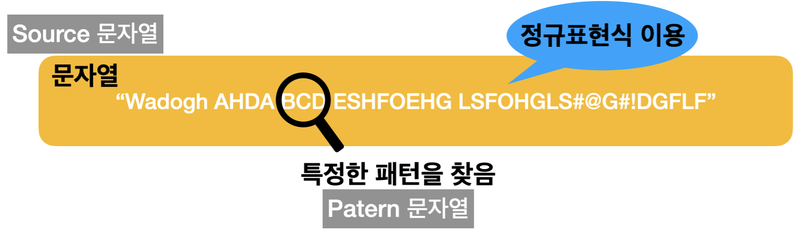

### Regex (Regular Expression) 시작하기
---
정규 표현식의 사용법은 크게:

1) 찾고자 하는 **문자열의 패턴을 define**하고     
2) 정의된 패턴과 매칭되는 경우를 찾아 다양한 처리를 하는 2단계로 나누어집니다.     

이중 1)에 해당하는 과정을 컴파일(compile)이라고 합니다.

In [56]:
import re

# 1단계 :  "the"라는 패턴을 컴파일한 후 패턴 객체를 리턴합니다. 
pattern = re.compile("the")    

# 2단계 : 컴파일된 패턴 객체를 활용하여 다른 텍스트에서 검색을 수행합니다.
pattern.findall('of the people, for the people, by the people')

['the', 'the', 'the']

아래 코드는 위에서 2단계로 수행했던 내역을 명시적 컴파일 과정 없이 한줄로 동일하게 처리하고 있습니다.

In [57]:
re.findall('the', 'of the people, for the people, by the people')

['the', 'the', 'the']

아래쪽 경우가 간결해서 더 좋은 것 같습니다.     
하지만 명시적으로(explicitly) 패턴 객체를 생성한 경우 해당 객체를 **반복 사용 가능**하다는 점이 장점이 될 때가 있습니다.

### 메소드
---
정규 표현식의 객체를 컴파일했으니 이제 위 2단계에서 패턴 객체를 활용해서 호출 가능한 메소드와 속성을 알아 볼 차례입니다.    
많이 사용되고 있는 메소드들을 정리해 보았는데요. 한번 가볍게 살펴 봅시다.

- search() : 일치하는 패턴 찾기 * 일치 패턴이 있으면 <mark>MatchObject</mark>를 반환합니다.

- match() : search()와 비슷하지만, 패턴이 검색대상에 <mark>처음부터 일치</mark>해야 합니다.

- findall() : <mark>일치하는 모든 패턴 찾기</mark> * 모든 일치 패턴을 <mark>리스트</mark>에 담아서 반환합니다.

- split() : <mark>패턴으로 나누기</mark>

- sub() : <mark>일치하는 패턴으로 대체하기</mark>

아래는 search(), match() 등이 리턴하는 <mark>MatchObject</mark>가 가진 메소드입니다.

- group() : 실제 결과에 <mark>해당하는 문자열</mark>을 반환합니다.


In [58]:
src = "My name is..."
regex = re.match("My", src) # match() 메소드로 My라는 패턴을 검색한다.
if regex:
    print(regex.group())    # My패턴이 처음부터 검색에 나온다면 실제 결과에 해당하는 문자열을 반환한다.
else:
    print("No!")

My


### 패턴 : 특수문자, 메타문자
---
패턴이야말로 정규 표현식을 강력하게 해주는 도구 인데요.     
특수문자 혹은 메타문자라 불리는 \[]. -. . ? * + {} / 등을 이용해 특수한 패턴을 만들 수 있습니다. 자, 어떤 것들이 있는지 볼까요?

* \[ ] : 문자  **
* \- : 범위   **
* \. : 하나의 문자
* \? : 0회 또는 1회 반복
- \* : 0회 이상 반복 **
* \+ : 1회 이상 반복 **
* {m, n} : m ~ n
* \d : 숫자
* \D : 비숫자
* \w : 알파벳 문자
* \W : 비알파벳 문자
* \s : 공백 문자
* \S : 비공백 문자
* \b : 단어 경계
* \B : 비 단어 경계

In [72]:
#- 연도(숫자)
text = """
The first season of America Premiere League  was played in 1993. 
The second season was played in 1995 in South Africa. 
Last season was played in 2019 and won by Chennai Super Kings (CSK).
CSK won the title in 2000 and 2002 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.
"""
pattern = re.compile("[0-9]\d\d\d")
pattern.findall(text)

['1993', '1995', '2019', '2000', '2002', '2013', '2015', '2017']

In [74]:
#- s로 시작하는 단어
text = """
The first season of America Premiere League  was played in 1993. 
The second season was played in 1995 in South Africa. 
Last season was played in 2019 and won by Chennai Super Kings (CSK).
CSK won the title in 2000 and 2002 as well.
Mumbai Indians (MI) has also won the title 3 times in 2013, 2015 and 2017.
"""
pattern = re.compile("[/s]")
pattern.findall(text)

['s',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's']

In [77]:
#- 전화번호(숫자, 기호)
phonenumber = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')
phone = phonenumber.search('This is my phone number 010-111-1111')
if phone:
  print(phone.group())
print('------')
phone = phonenumber.match ('This is my phone number 010-111-1111')
if phone:
  print(phone.group())


010-111-1111
------


In [76]:
#- 이메일(알파벳, 숫자, 기호)
text = "My e-mail adress is doingharu@aiffel.com, and tomorrow@aiffel.com"
pattern = re.compile("[0-9a-zA-Z]+@[0-9a-z]+\.[0-9a-z]+")
pattern.findall(text)

['doingharu@aiffel.com', 'tomorrow@aiffel.com']

### 구현 순서
---
위 예제들에서 정규 표현식을 구현한 순서를 그림과 함께 간단히 정리하고 넘어가 봅시다.      
패턴들이 덜 익숙한 것 뿐 정규식의 구현 과정은 매우 간단한 것을 확인하실 수 있을 거에요.

- <mark>import re</mark> 를 통해 정규식 모듈을 가져옵니다.      
- <mark>re.compile()</mark> 함수로 <mark>Regex</mark> 객체를 만듭니다.      
- 검색할 문자열을 <mark>Regex</mark> 객체의 <mark>search()</mark> , <mark>findall()</mark> 메소드로 전달합니다.

# 11.5 파일과 디렉토리 (1) 파일
---
### 파일을 열고 객체로 만들어 주는 작업
---

In [83]:
f = open("hello.txt","w") 
#- open(파일명, 파일모드)
#- 파일을 열고 파일 객체를 반환합니다. 
for i in range(10):
    f.write("안녕"+' ')
    #- write() 메소드로 '안녕'을 10번 씁니다.
f.close()
#- 작업이 끝나면 close() 메소드로 닫아줍니다. *필수!

In [85]:
with open("hello.txt", "r") as f:
  print(f.read())

안녕 안녕 안녕 안녕 안녕 안녕 안녕 안녕 안녕 안녕 


<mark>hello.txt</mark> 파일에 저장된 내용이 읽힌 것을 확인하실 수 있었을 거에요.     
이제 파일에 대해 감이 좀 잡히셨나요?

여기서 <mark>with</mark> 구문을 사용해서 파일을 열어서 파일 객체를 f로 받아서 <mark>f.read()</mark>를 통해 내용을 읽었는데요,    
<mark>f.close()</mark>를 명시적으로 호출하지 않고 있습니다.     
이것은 실수가 아니라, <mark>with</mark>를 통해 open된 객체는 <mark>with</mark>문이 종료될 때 자동으로 <mark>close</mark>되는 것이 보장되기 때문입니다.     
시스템 리소스의 안정적 사용을 위해 with문 활용을 권장합니다.

마지막으로 파일 관련 메소드를 간단히 정리해 본 뒤 다음 스텝으로 넘어가 봅시다.

**파일 관련 메소드**
- f.read() : 파일을 읽는다.
- f.readline() : 파일을 한 줄씩 읽는다.
- f.readlines() : 파일 안의 모든 줄을 읽어 그 값을 리스트로 반환한다.
- f.write(str) : 파일에 쓴다. 문자열 타입을 인자로 받는다.
- f.writelines(str) : 파일에 인자를 한 줄씩 쓴다.
- f.close() : 파일을 닫는다.
- f.seek(offset) : 새 파일의 위치를 찾는다.

# 11-6. 파일과 디렉토리 (2) 디렉토리
---
### 디렉토리
---

# 11-7. 파일과 디렉토리 (3) 모듈과 패키지
---
파이썬에서는 지원하는 디렉토리 관련 표준 라이브러리는 다음과 같습니다:    

- sys
- os
- glob

이 모듈들을 <mark>import</mark> 해서 디렉토리 관련 작업을 하는 것이지요.      
파이썬 프로그램의 <mark>실행 파일(python.exe)</mark>은 어디에 저장돼 있는지 확인해 보겠습니다.

In [87]:
#- 현재 실행되고 있는 파이썬 실행 파일의 디렉토리를 반환합니다.

import sys
sys.executable

'/Users/kyurishin/anaconda3/envs/aiffel/bin/python'

In [89]:
import os
sys.executable

'/Users/kyurishin/anaconda3/envs/aiffel/bin/python'

In [91]:
#- 임포트할 때 불러오는 모듈들이 위치한 경로입니다.
sys.path

['/Users/kyurishin/workplace/aiffel',
 '/Users/kyurishin/anaconda3/envs/aiffel/lib/python37.zip',
 '/Users/kyurishin/anaconda3/envs/aiffel/lib/python3.7',
 '/Users/kyurishin/anaconda3/envs/aiffel/lib/python3.7/lib-dynload',
 '',
 '/Users/kyurishin/anaconda3/envs/aiffel/lib/python3.7/site-packages',
 '/Users/kyurishin/anaconda3/envs/aiffel/lib/python3.7/site-packages/IPython/extensions',
 '/Users/kyurishin/.ipython']

In [93]:
os.path

<module 'posixpath' from '/Users/kyurishin/anaconda3/envs/aiffel/lib/python3.7/posixpath.py'>

### 파이썬 모듈 및 패키지 개념 정리
---
**개념**      
- 모듈(module) : 파이썬으로 만든 코드가 들어간 파일 **.py**
- 패키지(package) : **__init__.py**가 포함된 폴더로 흔히 **라이브러리**라고 칭함
- PIP(Package Installer for Python) : **패키지 관리자**로 파이썬을 설치하면 기본으로 설치됨
- PyPA(Python Packaging Authority) : **파이선 패키지를 관리**하고 **유지**하는 그룹
- PyPI(The Python Package Index) : **파이썬 패키지들의 저장소**

**함수**
- sys.path : 현재 폴더와 파이썬 모듈들이 저장되어 있는 위치를 리스트 형태로 반환
- sys.path.append() : 자신이 만든 모듈의 경로를 **append 함수**를 이용해서 추가함으로써 추가한 디렉토리에 있는 파이썬 모듈을 불러와 사용할 수 있다.
- os.chdir() : 디렉토리 위치 변경
- os.getcwd() : 현재 자신의 디렉터리 위치를 반환
- os.mkdir() : 디렉토리 생성
- os.rmdir() : 디렉토리 삭제 (단, 디렉토리가 비어 있을 경우)
- glob.glob() : 해당 경로 안의 디렉토리나 파일들을 리스트 형태로 반환
- os.path.join() : 경로(path)를 병합하여 새 경로 생성
- os.listdir() : 디렉토리 안의 파일 및 서브 디렉토리 리스트
- os.path.exists() : 파일 혹은 디렉토리의 경로 존재 여부 확인
- os.path.isfile() : 파일 경로의 존재 여부 확인
- os.path.isdir() : 디렉토리 경로의 존재 여부 확인
- os.path.getsize() : 파일의 크기 확인

# 11-8. 여러가지 파일 포맷 다루기 (1) CSV 파일
---
### CSV : Comma Seperated Value의 약자로, 쉼표로 구분된 파일을 말합니다.

각각의 칼럼(column)을 쉼표(,)로 구분하는데요. 간단한 csv 파일을 만들어 보겠습니다.

아래 데이터는 빌보드 차트 1위 ~ 5위까지의 곡들입니다. 각 키(key)는 순위를, 값(value)은 곡명, 가수, 그리고 발매일에 대한 정보를 가지고 있네요.     
코드 실행을 통해 billboardchart.csv 파일을 생성해 봅시다.

In [98]:
billboardchart = {
  				 1 : ["Tho Box","Roddy Ricch","2019-12-19"],
                 2 : ["Don't Start Now", "Dua Lipa", "2019-11-01"],
                 3 : ["Life Is Good", "Future Featuring Drake", "2020-02-10"],
                 4 : ["Blinding", "The Weeknd", "2019-11-29"],
                 5 : ["Circles", "Post Malone","2019-08-30"]}

with open("billboardchart.csv","w") as f:
    for i in billboardchart.values():
        data = ",".join(i)
        f.write(data+"\n")

### 없었던 Column Headings 넣기
---

In [96]:
import csv

header = ["title", "singer", "released date"]

with open("billboardchart.csv","r") as inputfile:
    with open("billboardchart_out.csv","w", newline='\n') as outputfile:
        fi = csv.reader(inputfile, delimiter=',')
        fo = csv.writer(outputfile, delimiter=',')
        fo.writerow(header)
        for row in fi:
            fo.writerow(row)

# CSV 파일과 Pandas
---
pandas의 <mark>DataFrame</mark>은 <mark>to_csv</mark> 메소드를 지원합니다.      
이 메소드를 이용하면 csv 파일로 쉽게 저장할 수 있어요.    
데이터를 준비한 뒤 pandas를 활용 해 csv 파일로 저장해 보겠습니다.

In [97]:
#- 1. 데이터를 준비합니다.
fields = ["title", "singer", "released date"]
rows = [ ["Tho Box","Roddy Ricch","2019-12-19"],
               ["Don't Start Now", "Dua Lipa", "2019-11-01"],
               ["Life Is Good", "Future Featuring Drake", "2020-02-10"],
               ["Blinding", "The Weeknd", "2019-11-29"],
               ["Circles", "Post Malone","2019-08-30"]]

In [99]:
#- 2. 판다스를 이용해 데이터를 csv 파일로 저장합니다.
import pandas as pd

df=pd.DataFrame(rows, columns=fields)
df.to_csv('pandas.csv',index=False)

In [101]:
#- 3. 동일한 내용을 csv.writer를 이용해 수행해 봅니다.
import csv 

filename = "test.csv"
with open(filename, 'w+', newline='\n') as csv_file: 
    csv_writer = csv.writer(csv_file) 
    csv_writer.writerow(fields) 
    csv_writer.writerows(rows)

#- test.csv 파일을 직접 열어서 눈으로 살펴 보세요. -#

반대로, csv 파일을 DataFrame으로 변환시키면 데이터 분석 등 사용자가 편집하기에 용이 할 것이다.

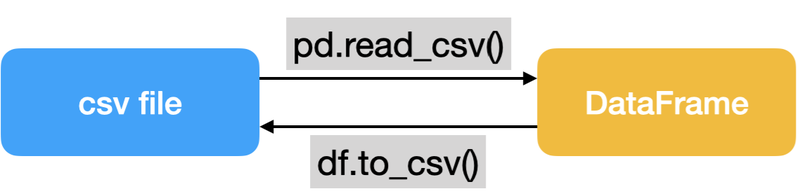

In [103]:
df = pd.read_csv('pandas.csv')
df.head()

,title,singer,released date
0,Tho Box,Roddy Ricch,2019-12-19
1,Don't Start Now,Dua Lipa,2019-11-01
2,Life Is Good,Future Featuring Drake,2020-02-10
3,Blinding,The Weeknd,2019-11-29
4,Circles,Post Malone,2019-08-30


# 11-9. 여러가지 파일 포맷 다루기 (2) XML 파일
---
### XML

> <mark>XML</mark>은 <mark>Extensible Markup Language</mark>의 약자로, **다목적 마크업 언어**입니다.

인터넷 웹상에서 문서 즉, 내용을 교환할 때 흔히들 마크업 언어를 이용합니다.     
마크업 언어를 아주 간단하게 말한다면, 태그라고 불리는 꺽쇠 모양의 괄호(<>)로 구분된 언어라고 할 수 있습니다.      
<mark>API</mark>에서 데이터를 요청하고 저장할 때 <mark>XML</mark> 이나 <mark>JSON</mark> 형식을 이용해 데이터를 교환한답니다.      

간단한 XML 파일을 한번 살펴 볼까요?

- XML은 다목적 마크업 언어(Extensible Markup Language)이다.
- 마크업 언어는 태그(tag)로 이루어진 언어를 말하며, 상위(부모)태그 - 하위(자식)태그의 계층적 구조를 가지고 있다.
- XML은 요소(element)들로 이루어져 있다.
- 요소는 <열린태그> 내용 </닫힌태그>가 기본적인 구조이며, 속성(attribute)값을 가질 수도 있다.


### XML 만들기
---
#### ElementTree
파이썬 표준 라이브러리인 <mark>ElementTree</mark>는 <mark>XML</mark> 관련 기능을 다음과 같이 제공합니다.

- Element() : 태그 생성
- SubElement() : 자식 태그 생성
- tag : 태그 이름
- text : 텍스트 내용 생성
- attrib : 속성 생성      

#### dump( )
생성된 <mark>XML 요소 구조</mark>를 <mark>시스템(sys.stdout)</mark>에 사용합니다.     

- write() : XML 파일로 저장     
- 리스트(list)와 유사한 메소드를 제공
- append, insert, remove, pop
- 아래는 맨 처음에 사용한 person XML을 만드는 코드입니다.

In [105]:
import xml.etree.ElementTree as ET

person = ET.Element("Person")
name = ET.Element("name")
name.text = "이펠"
person.append(name)

age = ET.Element("age")
age.text = "28"
person.append(age)

ET.SubElement(person, 'place').text = '강남'

ET.dump(person)

<Person><name>이펠</name><age>28</age><place>강남</place></Person>


In [106]:
person.attrib["id"] = "0x0001"
name.tag = "firstname"
ET.dump(person)

<Person id="0x0001"><firstname>이펠</firstname><age>28</age><place>강남</place></Person>


In [108]:
lastname = ET.Element('lastname', date='2020-03-20')
lastname.text = '아'
person.insert(1,lastname)
ET.dump(person)

<Person id="0x0001"><firstname>이펠</firstname><lastname date="2020-03-20">아</lastname><lastname date="2020-03-20">아</lastname><age>28</age><place>강남</place></Person>


In [111]:
# 삭제는 remove 혹은 pop 을 이용하면 됩니다. age 태그를 지우고 싶다면 다음과 같이 하면 되겠습니다
person.remove(age)

ValueError: list.remove(x): x not in list

In [112]:
# XML 파일로 저장하는 법
ET.ElementTree(person).write('person.xml')

### XML Parsing
---
그럼 이제 본격적으로 XML 파일을 파싱해 보도록 하겠습니다.

파이썬에서는 그 방법으로 크게 2가지를 제공하는데요. 위에서 살펴 본 ElementTree가 첫 번째이고, 다른 하나가 바로 BeautifulSoup 라이브러리입니다.



In [114]:
# books.xml 파일을 작업폴더에 저장한 후, 해당 파일의 title 태그에 속한 내용만 가져오는 코드를 작성

from bs4 import BeautifulSoup
with open("books.xml", "r", encoding='utf8') as f:
    booksxml = f.read() 
    #- 파일을 문자열로 읽기
 
soup = BeautifulSoup(booksxml,'lxml') 
#- BeautifulSoup 객체 생성 : lxml parser를 이용해 데이터 분석

for title in soup.find_all('title'): 
#-  태그를 찾는 find_all 함수 이용
    print(title.get_text())

FileNotFoundError: [Errno 2] No such file or directory: 'books.xml'

# 11-10. 여러가지 파일 포맷 다루기 (3) JSON 파일
---
### JSON

JSON은 JavaScript Object Notation의 약자로, 웹 언어인 JavaScript의 데이터 객체 표현 방식입니다.     
웹 브라우저와 다른 애플리케이션 사이에서 HTTP 요청으로 데이터를 보낼 때 널리 사용하는 표준 파일 포맷중 하나로,     
XML과 더불어 웹 API나 config 데이터를 전송할 때 많이 쓰입니다.

대표적인 예로 트위터는 개발자용 사이트를 통해 여러가지 API를 JSON 형태로 제공합니다.    

JSON 데이터의 예시를 함께 살펴 봅시다.


In [115]:
person = {
      "first name" : "Yuna",
      "last name" : "Jung",
      "age" : 33,
      "nationality" : "South Korea",
      "education" : [{"degree":"B.S degree", "university":"Daehan university", "major": "mechanical engineering", "graduated year":2010}]
       } 

특징:     
- 파이썬의 dictionary 타입과 매우 유사한 구조를 가지고 있다.
- CSV 파일에 비해 좀 더 유연하게 데이터를 표현할 수 있다.
- XML 파일보다 파일을 쉽게 읽고 쓸 수 있다는 장점이 있다.
- Javascript로 작성된 프로그램에서 쉽게 다룰 수 있다.
- 웹에서 JavaScript나 JavaScript 기반의 Framework가 많이 사용되고 있는 점을 미루어 봤을 때 이는 큰 강점이 될 수 있다.

### JSON Parsing
---

1. **JSON 파일 저장**

파이썬 <mark>dictionary</mark> 타입은 <mark>JSON</mark>으로 저장할 수 있습니다. 위 예시로 보인 <mark>person</mark>이라는 <mark>dict</mark> 객체를 <mark>JSON</mark> 파일로 저장해 보겠습니다.

In [117]:
import json

person = {
      "first name" : "Yuna",
      "last name" : "Jung",
      "age" : 33,
      "nationality" : "South Korea",
      "education" : [{"degree":"B.S degree", "university":"Daehan university", "major": "mechanical engineering", "graduated year":2010}]
       } 

with open("person.json", "w") as f:
    json.dump(person , f)

2. **JSON** 파일 읽기    
파이썬 <mark>dict</mark> 객체로 쉽게 읽어들일 수 있다.


In [119]:
import json

with open("person.json", "r", encoding="utf-8") as f:
    contents = json.load(f)
    print(contents["first name"])
    print(contents["education"])

Yuna
[{'degree': 'B.S degree', 'university': 'Daehan university', 'major': 'mechanical engineering', 'graduated year': 2010}]
